In [1]:
import sys

sys.path.append("../../src/stong_core_cython")
sys.path.append("../../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unrestricted_hartree_fock
import basis_data
import importlib
from scipy.constants import physical_constants
from scipy.optimize import minimize

importlib.reload(unrestricted_hartree_fock)
importlib.reload(basis_data)

from atom import *
from unrestricted_hartree_fock import *
from basis_data import *

In [3]:
df = pd.read_csv("../make_base/sto_ng/sto_3g.csv")

In [4]:
df_zetas = pd.read_csv("./zetas_4s.csv")

In [5]:
def solve(zetas, atom_symbol):
    atoms = [Atom(atom_symbol, np.array([0.0, 0.0, 0.0]))]
    molecule = Molecule(atoms)
    basis_data = {atom_symbol: create_basis_data(df, zetas, 4, 1)}
    hartreefock = UnrestrictedHartreeFock(
        molecule, basis_data, max_iter=10000, tol=1e-10
    )
    hartreefock.scf()
    hartreefock.calculate_total_energy()
    results = hartreefock.get_results()
    return results, hartreefock


def get_ionization_energy(df_zetas, atom_symbol, n_occ):
    results, _ = solve(df_zetas[atom_symbol], atom_symbol)
    energy_lebels = np.hstack((results["val_up"], results["val_dn"]))
    energy_lebels = np.sort(energy_lebels)
    return -energy_lebels[n_occ]

In [6]:
elements = [
    "H",
    "He",
    "Li",
    "Be",
    "B",
    "C",
    "N",
    "O",
    "F",
    "Ne",
    "Na",
    "Mg",
    "Al",
    "Si",
    "P",
    "S",
    "Cl",
    "Ar",
    "K",
    "Ca",
]
ionization_energies = {}
electron_affinities = {}
for i, element in enumerate(elements):
    print(element)
    ionization_energies[element] = get_ionization_energy(df_zetas, element, i)
    print(f"ionization_energies = {ionization_energies[element]} Hartree")

H
Start SCF for Molecule(atoms=[Atom(symbol=H, atomic_number=1, position=[0. 0. 0.])])
ionization_energies = 0.4997052498011501 Hartree
He
Start SCF for Molecule(atoms=[Atom(symbol=He, atomic_number=2, position=[0. 0. 0.])])
ionization_energies = 0.9161292161439964 Hartree
Li
Start SCF for Molecule(atoms=[Atom(symbol=Li, atomic_number=3, position=[0. 0. 0.])])
ionization_energies = 0.1840537557913893 Hartree
Be
Start SCF for Molecule(atoms=[Atom(symbol=Be, atomic_number=4, position=[0. 0. 0.])])
ionization_energies = 0.27187547415745505 Hartree
B
Start SCF for Molecule(atoms=[Atom(symbol=B, atomic_number=5, position=[0. 0. 0.])])
ionization_energies = 0.31145735755712123 Hartree
C
Start SCF for Molecule(atoms=[Atom(symbol=C, atomic_number=6, position=[0. 0. 0.])])
ionization_energies = 0.39951203665300045 Hartree
N
Start SCF for Molecule(atoms=[Atom(symbol=N, atomic_number=7, position=[0. 0. 0.])])
ionization_energies = 0.48432349645246475 Hartree
O
Start SCF for Molecule(atoms=[Atom(s

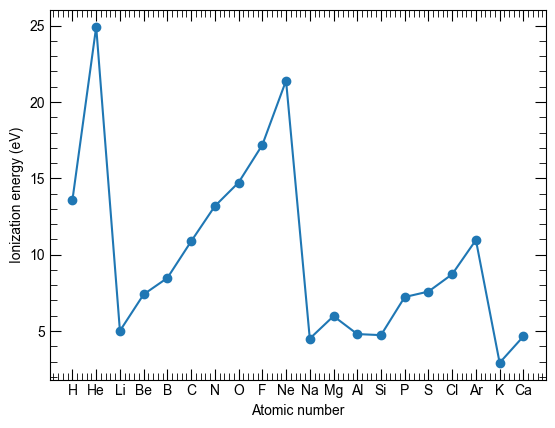

In [7]:
hartree_to_ev_factor = physical_constants["Hartree energy in eV"][0]
fig, ax = plt.subplots()
ax.plot(
    range(1, 21),
    hartree_to_ev_factor * np.array(list(ionization_energies.values())),
    marker="o",
)
ax.set_xticks(range(1, 21))
ax.set_xticklabels(elements)
ax.set_xlabel("Atomic number")
ax.set_ylabel("Ionization energy (eV)")
plt.show()